In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [82]:
colors = ["#012060", "#1ba9e7", "#ffa12b", "#febbfe", "#4cffdf", "#965ff6", "#cbebfa" ,"#012060", "#1ba9e7"]
custom_pallet = sns.color_palette(colors)
# Set your custom color palette
sns.set_context("notebook", font_scale=1.15)
sns.set_style("ticks")
sns.set_palette(custom_pallet)
#sns.despine(offset=10, trim=True);

In [56]:
google_trends = pd.read_csv('./datasets/google_trends.csv', index_col='week', parse_dates=['week'])
google_trends.columns = ['Trabajo', 'Axie Infinity', 'Plant Vs Undead']
google_trends = google_trends.rolling(2).mean()

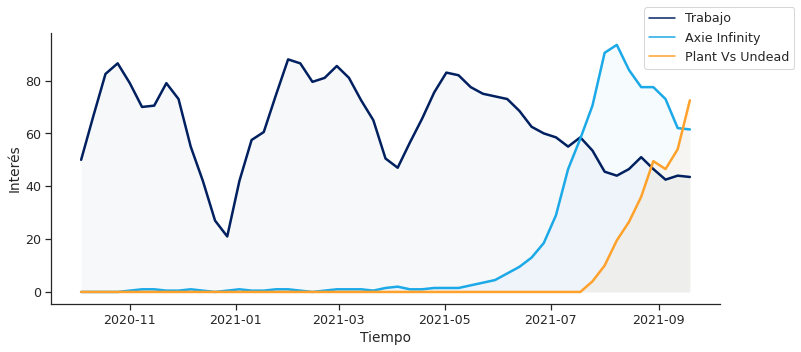

In [57]:
fig = plt.figure(figsize=(12,5))
sns.lineplot(data=google_trends, linewidth=2.5, dashes=False)
plt.fill_between(google_trends.index, google_trends['Trabajo'], alpha=0.03)
plt.fill_between(google_trends.index, google_trends['Axie Infinity'], alpha=0.04)
plt.fill_between(google_trends.index, google_trends['Plant Vs Undead'], alpha=0.06)
plt.ylabel('Interés')
plt.xlabel('Tiempo')
sns.despine()
plt.legend(loc='center right', bbox_to_anchor=(1.12, 0.98), ncol=1)
fig.savefig('./images/trends.png', transparent=True)

In [58]:
col_dtypes = {
    'id':'uint32',
    'sireId':'uint16',
    'matronId':'uint16',
    'birthDate':'uint32',
    'stage':'uint8',
    'breedCount':'uint8',
    'level':'uint8',
    'hp':'uint8',
    'speed':'uint8',
    'skill':'uint8',
    'morale':'uint8',
    'withPrice': 'float32'
}

axies = pd.read_csv('./datasets/dataset_0_25000.csv', index_col='txHash', dtype=col_dtypes, parse_dates=['birthDate', 'timestamp'])
axies['birthDate'] = pd.to_datetime(axies['birthDate'], unit='s')
axies['timestamp'] = pd.to_datetime(axies['timestamp'], unit='s')
axies.drop(columns=['stage','title', 'level', 'Unnamed: 0'], inplace=True)
axies = axies[ (axies['timestamp'] > datetime(2021,1,1)) & (axies['withPrice'] < 2)]

<AxesSubplot:xlabel='timestamp', ylabel='withPrice'>

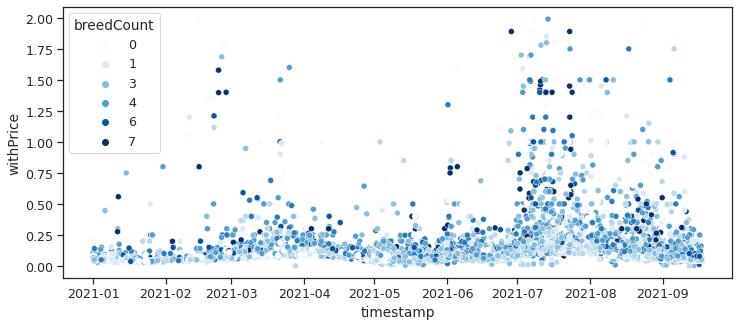

In [31]:
fig = plt.figure(figsize=(12,5))
sns.scatterplot(data=axies, x='timestamp', y='withPrice', hue='breedCount', palette=sns.color_palette("Blues", as_cmap=True))

<AxesSubplot:xlabel='class', ylabel='withPrice'>

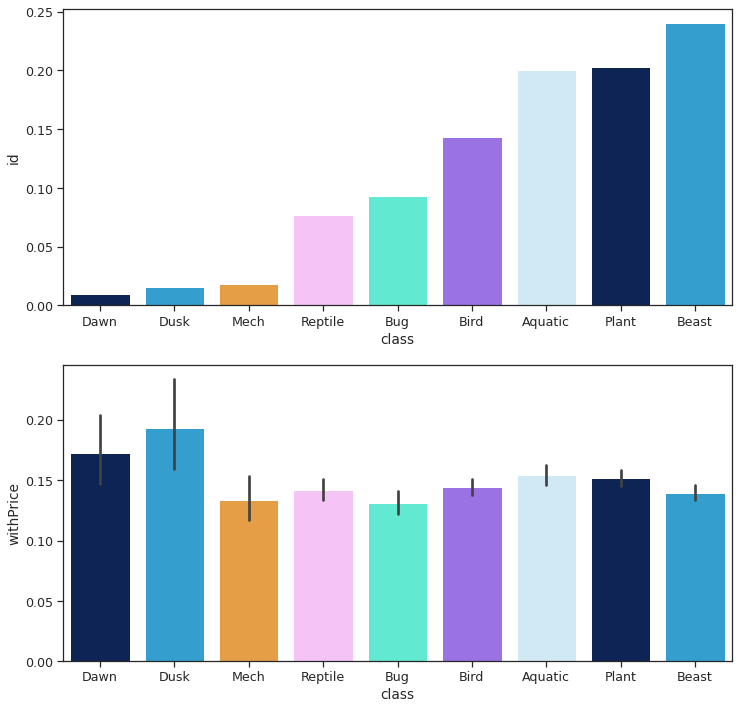

In [83]:
ax_sub = axies.groupby(['class']).agg({'id':'count'})
ax_sub.id = ax_sub.id / ax_sub.id.sum()
ax_sub = ax_sub.sort_values('id').reset_index()

fig, [ax1, ax2] = plt.subplots(2,1,figsize=(12,12))

sns.barplot(data=ax_sub, x='class', y='id', ax=ax1, )
sns.barplot(data=axies, x='class', y='withPrice', ax=ax2, order=ax_sub['class'])

<AxesSubplot:xlabel='breedCount', ylabel='withPrice'>

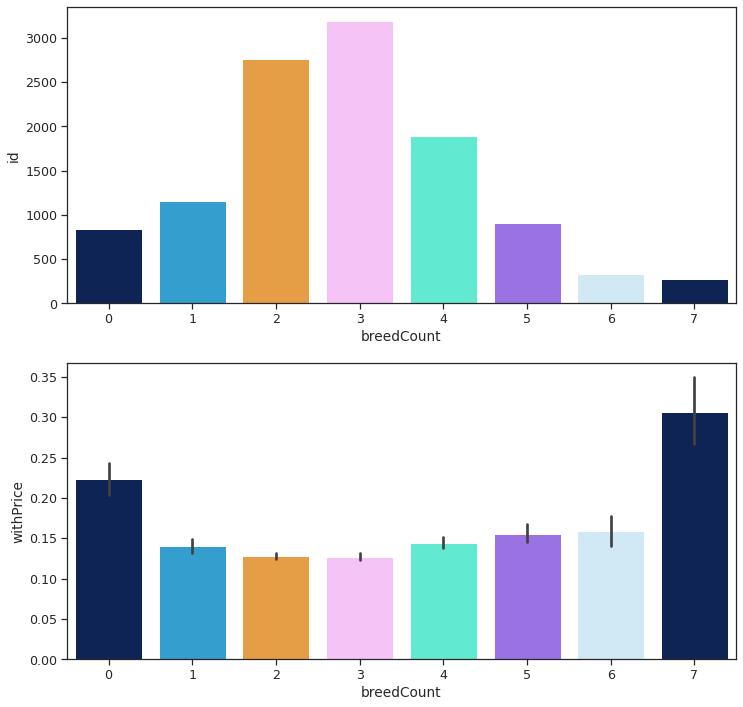

In [84]:
axis_breed = axies.groupby('breedCount').agg({'id':'count','withPrice':'mean'})
axis_breed = axis_breed.reset_index()

fig, [ax1, ax2] = plt.subplots(2,1,figsize=(12,12))

sns.barplot(data=axis_breed, x='breedCount', y='id', ax=ax1)
sns.barplot(data=axies, x='breedCount', y='withPrice', ax=ax2)

In [50]:
axies_corr = axies.corr()

corr = axies_corr.withPrice.sort_values(ascending=False).to_frame()
corr = corr.reset_index()
corr = corr.iloc[1:-3]

<Figure size 864x360 with 0 Axes>

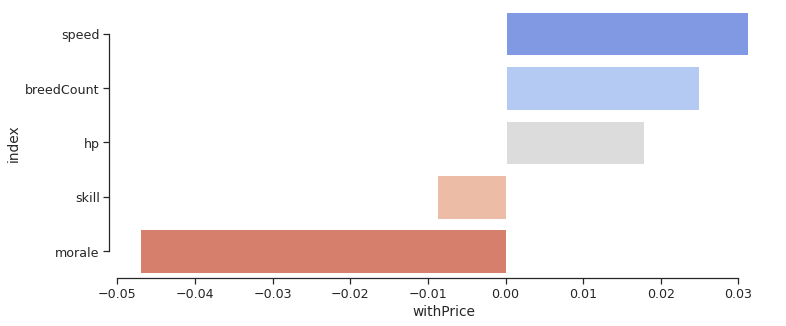

In [79]:
fig = plt.figure(figsize=(12,5))
sns.barplot(x="withPrice", y="index", data=corr, label="Alcohol-involved", palette="coolwarm")
sns.despine(trim=True)